In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor





In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [20]:
len(train)

8523

In [35]:
train[train.Outlet_Size.isnull()].sort_values("Outlet_Identifier")

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
2966,FDY60,10.500,Regular,0.044140,Baking Goods,143.9128,OUT010,1998,NaN,Tier 3,Grocery Store,143.8128
2963,FDR27,15.100,Regular,0.160852,Meat,131.3942,OUT010,1998,NaN,Tier 3,Grocery Store,397.4826
1545,FDK52,18.250,Low Fat,0.132596,Frozen Foods,226.2062,OUT010,1998,NaN,Tier 3,Grocery Store,677.1186
1548,NCK18,9.600,Low Fat,0.011211,Household,166.9184,OUT010,1998,NaN,Tier 3,Grocery Store,660.4736
6489,FDX32,15.100,Regular,0.000000,Fruits and Vegetables,146.2786,OUT010,1998,NaN,Tier 3,Grocery Store,433.4358
1555,FDU58,6.610,Regular,0.048560,Snack Foods,188.4898,OUT010,1998,NaN,Tier 3,Grocery Store,187.0898
6469,NCW06,16.200,Low Fat,0.084260,Household,192.3162,OUT010,1998,NaN,Tier 3,Grocery Store,769.6648
2944,DRB48,16.750,Regular,0.041600,Soft Drinks,40.9822,OUT010,1998,NaN,Tier 3,Grocery Store,157.1288
2943,FDU38,10.800,Low Fat,0.138172,Dairy,191.4504,OUT010,1998,NaN,Tier 3,Grocery Store,575.2512


In [37]:
train[train["Outlet_Identifier"]=='OUT045']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
33,FDO23,17.850,Low Fat,0.000000,Breads,93.1436,OUT045,2002,NaN,Tier 2,Supermarket Type1,2174.5028
46,NCP05,19.600,Low Fat,0.000000,Health and Hygiene,153.3024,OUT045,2002,NaN,Tier 2,Supermarket Type1,2428.8384
47,FDV49,10.000,Low Fat,0.025880,Canned,265.2226,OUT045,2002,NaN,Tier 2,Supermarket Type1,5815.0972
56,NCX54,9.195,Low Fat,0.048157,Household,106.1622,OUT045,2002,NaN,Tier 2,Supermarket Type1,2117.2440
61,FDV27,7.970,Regular,0.040071,Meat,87.3514,OUT045,2002,NaN,Tier 2,Supermarket Type1,1062.6168
67,FDZ03,13.650,Regular,0.078946,Dairy,186.0240,OUT045,2002,NaN,Tier 2,Supermarket Type1,1118.5440
68,DRH37,17.600,Low Fat,0.041701,Soft Drinks,164.8526,OUT045,2002,NaN,Tier 2,Supermarket Type1,2302.3364
72,FDH35,18.250,Low Fat,0.000000,Starchy Foods,164.7526,OUT045,2002,NaN,Tier 2,Supermarket Type1,4604.6728
79,FDV25,5.905,Low Fat,0.000000,Canned,222.5456,OUT045,2002,NaN,Tier 2,Supermarket Type1,5305.0944


In [27]:
train[train.Item_Weight.isnull()].sort_values("Item_Identifier")

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4416,DRA24,NaN,Regular,0.039735,Soft Drinks,165.7868,OUT027,1985,Medium,Tier 3,Supermarket Type3,4913.6040
2879,DRA24,NaN,Regular,0.069909,Soft Drinks,163.2868,OUT019,1985,Small,Tier 1,Grocery Store,491.3604
6179,DRA59,NaN,Regular,0.223985,Soft Drinks,186.2924,OUT019,1985,Small,Tier 1,Grocery Store,555.2772
6057,DRA59,NaN,Regular,0.127308,Soft Drinks,186.6924,OUT027,1985,Medium,Tier 3,Supermarket Type3,7033.5112
3733,DRB01,NaN,Low Fat,0.081841,Soft Drinks,190.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,569.2590
2533,DRB25,NaN,Low Fat,0.069123,Soft Drinks,106.0938,OUT027,1985,Medium,Tier 3,Supermarket Type3,2787.0388
458,DRB48,NaN,Regular,0.024733,Soft Drinks,40.2822,OUT027,1985,Medium,Tier 3,Supermarket Type3,1296.3126
2927,DRC01,NaN,Regular,0.019107,Soft Drinks,48.4692,OUT027,1985,Medium,Tier 3,Supermarket Type3,1034.6532
6719,DRC25,NaN,Low Fat,0.000000,Soft Drinks,87.3882,OUT027,1985,Medium,Tier 3,Supermarket Type3,1374.2112
1708,DRC25,NaN,Low Fat,0.079440,Soft Drinks,86.7882,OUT019,1985,Small,Tier 1,Grocery Store,85.8882


In [34]:
train[train["Item_Identifier"]=='DRB01']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3465,DRB01,7.39,Low Fat,0.082367,Soft Drinks,187.753,OUT049,1999,Medium,Tier 1,Supermarket Type1,1518.024
3571,DRB01,7.39,Low Fat,0.082171,Soft Drinks,190.953,OUT013,1987,High,Tier 3,Supermarket Type1,2466.789
3733,DRB01,NaN,Low Fat,0.081841,Soft Drinks,190.053,OUT027,1985,Medium,Tier 3,Supermarket Type3,569.259


In [5]:
def item_fat (x):
    if x=="low fat":
        return "Low Fat"
    elif x=="LF":
        return "Low Fat"
    elif x=="reg":
        return "Regular"
    else:
        return x
    
train['Item_Fat_Content'] = train.Item_Fat_Content.apply(item_fat)

In [14]:
item_identifier = train.Item_Identifier.unique()
item_identifier
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [22]:
item = train[train.Item_Weight.notnull()][["Item_Identifier","Item_Weight"]]
item.isnull().sum()
item = item.drop_duplicates().sort_values('Item_Identifier')
training_data = pd.merge(train,item,how="inner",)
training_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

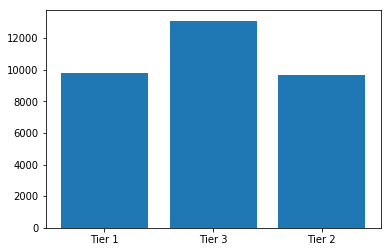

In [18]:
plt.bar(train['Outlet_Location_Type'],train["Item_Outlet_Sales"])
plt.show()

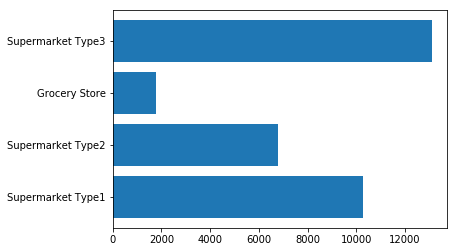

In [28]:
plt.barh(train['Outlet_Type'],train["Item_Outlet_Sales"])
plt.show()

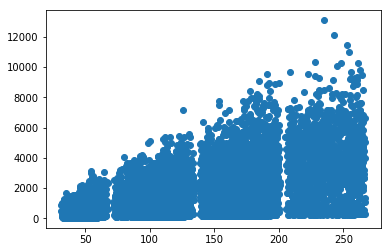

In [20]:
plt.scatter(train["Item_MRP"],train["Item_Outlet_Sales"])

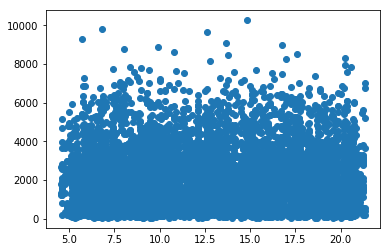

In [21]:
plt.scatter(train["Item_Weight"],train["Item_Outlet_Sales"])

(array([3.280e+03, 2.448e+03, 1.527e+03, 7.290e+02, 3.590e+02, 1.240e+02,
        3.600e+01, 1.600e+01, 2.000e+00, 2.000e+00]),
 array([   33.29   ,  1338.65748,  2644.02496,  3949.39244,  5254.75992,
         6560.1274 ,  7865.49488,  9170.86236, 10476.22984, 11781.59732,
        13086.9648 ]),
 <a list of 10 Patch objects>)

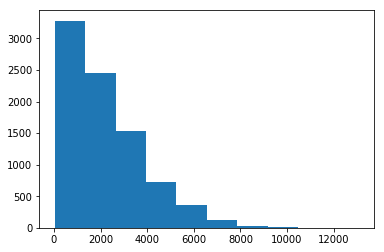

In [22]:
plt.hist(train["Item_Outlet_Sales"])

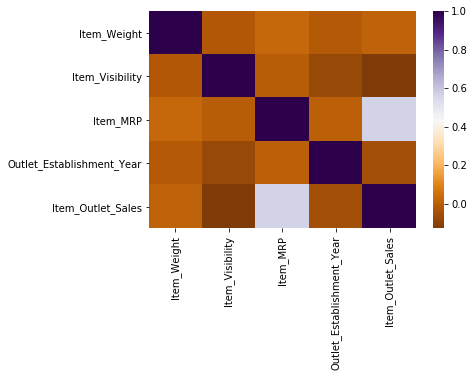

In [26]:
corr_matrix=train.corr()
sns.heatmap(corr_matrix, cmap='PuOr')


(array([483., 870., 865., 664., 779., 629., 755., 735., 677., 603.]),
 array([ 4.555 ,  6.2345,  7.914 ,  9.5935, 11.273 , 12.9525, 14.632 ,
        16.3115, 17.991 , 19.6705, 21.35  ]),
 <a list of 10 Patch objects>)

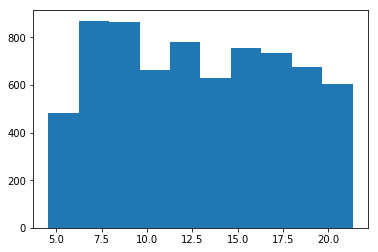

In [34]:
# Dealing with missing values in item_weight
item_weight = train.Item_Weight.dropna()
plt.hist(item_weight)

(array([ 483.,  870.,  865.,  664., 2242.,  629.,  755.,  735.,  677.,
         603.]),
 array([ 4.555 ,  6.2345,  7.914 ,  9.5935, 11.273 , 12.9525, 14.632 ,
        16.3115, 17.991 , 19.6705, 21.35  ]),
 <a list of 10 Patch objects>)

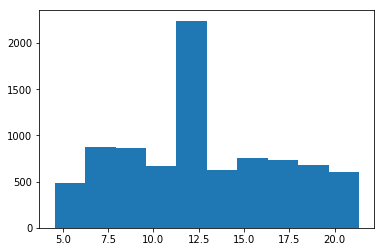

In [51]:
item_weight_mean = train.Item_Weight.fillna(np.mean(train.Item_Weight))
item_weight_median = train.Item_Weight.fillna(np.median(item_weight))
plt.hist(item_weight_median)


/Users/raihanahmed/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


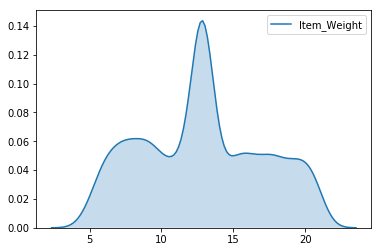

In [56]:
sns.kdeplot(item_weight_mean,shade=True)

(array([2403., 2730., 1495.,  931.,  561.,  265.,   57.,   35.,   29.,
          17.]),
 array([0.0035747 , 0.03605632, 0.06853795, 0.10101957, 0.1335012 ,
        0.16598282, 0.19846445, 0.23094607, 0.2634277 , 0.29590932,
        0.32839095]),
 <a list of 10 Patch objects>)

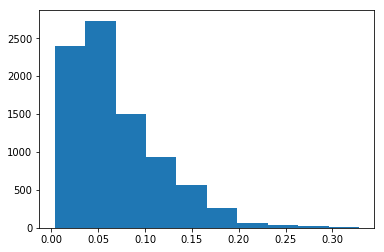

In [7]:
#plt.boxplot(train["Item_Visibility"])
train.Item_Visibility.describe()
Item_Visibility = [np.mean(train['Item_Visibility']) if x==0.00 else x for x in train['Item_Visibility']]
Item_Visibility
plt.hist(Item_Visibility)

(array([3.280e+03, 2.448e+03, 1.527e+03, 7.290e+02, 3.590e+02, 1.240e+02,
        3.600e+01, 1.600e+01, 2.000e+00, 2.000e+00]),
 array([   33.29   ,  1338.65748,  2644.02496,  3949.39244,  5254.75992,
         6560.1274 ,  7865.49488,  9170.86236, 10476.22984, 11781.59732,
        13086.9648 ]),
 <a list of 10 Patch objects>)

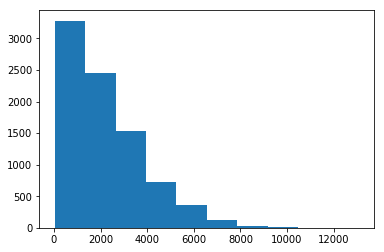

In [17]:
plt.hist(train["Item_Outlet_Sales"])

In [14]:
X = train.drop(["Item_Identifier","Outlet_Identifier","Item_Outlet_Sales"],axis=1)
X["Outlet_Size"]= X.Outlet_Size.fillna("Unknown")
#X.head()
X = pd.get_dummies(X,columns=['Item_Fat_Content','Item_Type','Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type'],
               drop_first=True)

y = train["Item_Outlet_Sales"]


In [17]:
X_mean = X
X_mean["Item_Weight"] = X_mean.Item_Weight.fillna(np.mean(X_mean["Item_Weight"]))
X_train, X_test, y_train, y_test = train_test_split(X_mean,y,test_size = 0.3,random_state = 123)
X_train.dtypes

Item_Weight                        float64
Item_Visibility                    float64
Item_MRP                           float64
Outlet_Establishment_Year            int64
Item_Fat_Content_Regular             uint8
Item_Type_Breads                     uint8
Item_Type_Breakfast                  uint8
Item_Type_Canned                     uint8
Item_Type_Dairy                      uint8
Item_Type_Frozen Foods               uint8
Item_Type_Fruits and Vegetables      uint8
Item_Type_Hard Drinks                uint8
Item_Type_Health and Hygiene         uint8
Item_Type_Household                  uint8
Item_Type_Meat                       uint8
Item_Type_Others                     uint8
Item_Type_Seafood                    uint8
Item_Type_Snack Foods                uint8
Item_Type_Soft Drinks                uint8
Item_Type_Starchy Foods              uint8
Item_Fat_Content_Regular             uint8
Outlet_Size_Medium                   uint8
Outlet_Size_Small                    uint8
Outlet_Size

In [7]:
scaler_train = StandardScaler()
scaler_test = StandardScaler()

scaler_train.fit(X_train["Item_weight","Item_visibility","Item_MRP"])
X_train_scaled = scaler_train.transform(X_train)

scaler_test.fit(X_test)
X_test_scaled = scaler_test.transform(X_test)

# X_mean_scaler = scaler.transform(X_mean)
# X_mean_scaler = pd.DataFrame(X_mean_scaler,index=X_mean.index,columns=X_mean.columns)


# Linear Regression

In [51]:
import statsmodels.api as sm
model_ols = sm.OLS(y_train,X_train_scaled)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     959.1
Date:                Thu, 17 Jan 2019   Prob (F-statistic):               0.00
Time:                        08:24:36   Log-Likelihood:                -50373.
No. Observations:                5966   AIC:                         1.008e+05
Df Residuals:                    5935   BIC:                         1.010e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Item_Weight                        -1.8782      3.477     -0.540      0.589      -8.694       4.937
Item_Visibility                  -404.4374    296.703     -1.363      0.173    -986.083     177.208
Item_MRP                           15.4235      0.236     65.343      0.000      14.961      15.886
Outlet_Establishment_Year          -0.9094      0.097     -9.375      0.000      -1.100      -0.719
Item_Fat_Content_Low Fat           10.7124     39.300      0.273      0.785     -66.330      87.755
Item_Fat_Content_Regular           37.3555     40.841      0.915      0.360     -42.707     117.418
Item_Fat_Content_low fat           34.2839     77.161      0.444      0.657    -116.980     185.547
Item_Fat_Content_reg              -46.4762     74.791     -0.621      0.534    -193.094     100.142
Item_Type_Breads                  -44.0321     98.067     -0.449      0.653    -236.280     148.216
Item_Type_Breakfast                11.7273    138.299      0.085      0.932    -259.389     282.844
Item_Type_Canned                   -6.2394     75.324     -0.083      0.934    -153.902     141.423
Item_Type_Dairy                   -50.1780     73.422     -0.683      0.494    -194.112      93.756
Item_Type_Frozen Foods            -82.1427     70.340     -1.168      0.243    -220.035      55.750
Item_Type_Fruits and Vegetables    10.2976     65.395      0.157      0.875    -117.901     138.496
Item_Type_Hard Drinks             -91.2303    110.242     -0.828      0.408    -307.344     124.883
Item_Type_Health and Hygiene      -52.3408     80.225     -0.652      0.514    -209.611     104.929
Item_Type_Household               -15.0636     71.361     -0.211      0.833    -154.957     124.830
Item_Type_Meat                    -24.8415     83.897     -0.296      0.767    -189.310     139.627
Item_Type_Others                  -33.9673    113.047     -0.300      0.764    -255.580     187.646
Item_Type_Seafood                 154.4193    190.365      0.811      0.417    -218.765     527.603
Item_Type_Snack Foods             -31.0142     65.867     -0.471      0.638    -160.137      98.108
Item_Type_Soft Drinks             -23.3876     83.599     -0.280      0.780    -187.272     140.496
Item_Type_Starchy Foods           -97.2165    126.314     -0.770      0.442    -344.838     150.405
Item_Fat_Content_Low Fat           10.7124     39.300      0.273      0.785     -66.330      87.755
Item_Fat_Content_Regular           37.3555     40.841      0.915      0.360     -42.707     117.418
Item_Fat_Content_low fat           34.2839     77.161      0.444      0.657    -116.980     185.547
Item_Fat_Content_reg              -46.4762     74.791     -0.621      0.534    -193.094     100.142
Outlet_Size_Medium                114.7624    118.309      0.970      0.332    -117

In [52]:
y_pred_ols = results.predict(X_test_scaled)

In [53]:

rmse_ols = np.sqrt(mean_squared_error(y_test,y_pred_lm))
rmse_ols

1137.88048597201

In [23]:

model_lm = LinearRegression()
model_lm.fit(X_train_scaled,y_train)
y_pred_lm = model_lm.predict(X_test_scaled)
rmse_lm = np.sqrt(mean_squared_error(y_test,y_pred_lm))
rmse_lm

1140.1824698334744

## Ridge Regression 

In [56]:


alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

ridge = Ridge()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

ridge_regressor = GridSearchCV(ridge, parameters,scoring='neg_mean_squared_error', cv=5)

ridge_regressor.fit(X_train_scaled, y_train)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

y_pred_ridge = ridge_regressor.predict(X_test_scaled)
rmse_ridge = np.sqrt(mean_squared_error(y_test,y_pred_ridge))
print(rmse_ridge)


{'alpha': 10}
-1278964.9891265214
1140.4176555346191


## Lasso Regression

In [35]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score

In [48]:
lassocv = LassoCV(cv=5, normalize=True)
lassocv.fit(X_train,y_train)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=True, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [49]:
y_pred_lassocv = lassocv.predict(X_test)
rmse_lassocv = np.sqrt(mean_squared_error(y_test,y_pred_lassocv))
rmse_lassocv

1139.5002136944713

In [37]:
r2_score(y_test,y_pred_lasso)

0.5682726792224002

In [34]:


lasso = Lasso()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv = 5)

lasso_regressor.fit(X_train_scaled, y_train)

print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

y_pred_lasso = lasso_regressor.predict(X_test_scaled)
rmse_lasso = np.sqrt(mean_squared_error(y_test,y_pred_lasso))
print(rmse_lasso)


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

{'alpha': 10}
-1275109.892752032
1141.9556901945741


# Support Vector Regression

In [18]:

for k in ['linear','sigmoid']:
    svr = SVR(kernel=k)
    svr.fit(X_train, y_train)
    confidence = svr.score(X_test, y_test)
    print(k,confidence)


linear 0.42284521784886353
sigmoid -0.05288375098388931


In [20]:
y_pred_svr = SVR(kernel='linear')

svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

rmse_svr = np.sqrt(mean_squared_error(y_test,y_pred_svr))
rmse_svr


1783.3422475147295

# Random Forest 

In [16]:

rf = RandomForestRegressor(n_estimators = 1000, random_state = 123)
rf.fit(X_train_scaled,y_train)
y_pred_rf = rf.predict(X_test_scaled)



In [17]:
rmse_rf = np.sqrt(mean_squared_error(y_test,y_pred_rf))
rmse_rf

1139.0561543673443

In [ ]:
# elastic net 